# Logistic Regression 

## import library

In [514]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [515]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [516]:
def linear_regression(x,y,theta):
    value = np.dot(theta, np.array([np.ones(x.size),x,y]))

    return value

## define sigmoid function with input $x$

In [517]:
def sigmoid(x,y,theta):
    
    f = linear_regression(x,y,theta)
    
    z = 1/(1+np.exp(-f))


    return z

## define loss function for the logistic regression

In [518]:
def compute_loss(x,y,label,theta):
    h = sigmoid(x,y,theta)
    t = 0.00001
    loss = 0
    
    loss = -((1/num_data)* (np.dot(label, np.log(h + t) ) + np.dot((1-label),np.log(1-h + t) )  ))
    
    return loss


## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [519]:
def compute_gradient(x,y,label,theta):
    
    X = np.array([np.ones(x.size),x,y]) #(3,600)

    h = sigmoid(x,y,theta) 
    l = label
   
    gradient = (1/num_data)*np.dot(X,(h-l))

    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [520]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters

theta_iteration =np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration, dtype=object)

## iterations for the gradient descent

In [ ]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient(point_x,point_y,label,theta)
    loss = compute_loss(point_x,point_y,label,theta)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    
    print("loss",loss_iteration[i]," theta",theta_iteration[i])


loss 0.6681057477663404  theta [ 0.          0.00353072 -0.00360356]
loss 0.644744123459959  theta [ 1.15663905e-07  6.94344738e-03 -7.08429770e-03]
loss 0.6229264473190647  theta [ 3.32816218e-07  1.02424299e-02 -1.04468031e-02]
loss 0.6025415095539001  theta [ 6.33118220e-07  1.34320307e-02 -1.36958331e-02]
loss 0.5834835920433299  theta [ 9.95483105e-07  1.65166539e-02 -1.68362256e-02]
loss 0.5656530086257976  theta [ 1.39729447e-06  1.95006934e-02 -1.98728268e-02]
loss 0.5489563929806199  theta [ 1.81541115e-06  2.23884897e-02 -2.28104323e-02]
loss 0.5333067832828768  theta [ 2.22696136e-06  2.51842943e-02 -2.56537395e-02]
loss 0.5186235499079036  theta [ 2.60994210e-06  2.78922433e-02 -2.84073117e-02]
loss 0.5048322072690526  theta [ 2.94364768e-06  3.05163373e-02 -3.10755517e-02]
loss 0.49186414463710654  theta [ 3.20895421e-06  3.30604273e-02 -3.36626839e-02]
loss 0.47965630439322793  theta [ 3.38848707e-06  3.55282061e-02 -3.61727427e-02]
loss 0.468150830167891  theta [ 3.46669

loss 0.14552163915089183  theta [-0.00181176  0.19468068 -0.21521378]
loss 0.14536826270693193  theta [-0.00181993  0.19492206 -0.2155225 ]
loss 0.14521593264168906  theta [-0.00182809  0.19516256 -0.2158302 ]
loss 0.14506463826710275  theta [-0.00183625  0.19540221 -0.21613688]
loss 0.14491436904208896  theta [-0.00184441  0.195641   -0.21644256]
loss 0.14476511456999813  theta [-0.00185255  0.19587894 -0.21674723]
loss 0.1446168645961254  theta [-0.0018607   0.19611603 -0.21705091]
loss 0.14446960900527311  theta [-0.00186884  0.19635229 -0.21735359]
loss 0.14432333781936324  theta [-0.00187697  0.19658771 -0.2176553 ]
loss 0.1441780411950993  theta [-0.0018851   0.19682231 -0.21795602]
loss 0.14403370942167618  theta [-0.00189323  0.19705609 -0.21825578]
loss 0.14389033291853676  theta [-0.00190135  0.19728905 -0.21855457]
loss 0.14374790223317413  theta [-0.00190947  0.1975212  -0.2188524 ]
loss 0.14360640803897887  theta [-0.00191758  0.19775255 -0.21914928]
loss 0.143465841133129

loss 0.12713588714494356  theta [-0.00337826  0.2314781  -0.263108  ]
loss 0.12708290310601494  theta [-0.00338557  0.23161716 -0.26329143]
loss 0.12703013681957823  theta [-0.00339287  0.23175593 -0.26347448]
loss 0.1269775869891985  theta [-0.00340018  0.23189442 -0.26365716]
loss 0.12692525232875024  theta [-0.00340747  0.23203261 -0.26383947]
loss 0.12687313156231406  theta [-0.00341477  0.23217051 -0.26402141]
loss 0.12682122342407526  theta [-0.00342206  0.23230812 -0.26420298]
loss 0.12676952665822314  theta [-0.00342935  0.23244545 -0.26438419]
loss 0.1267180400188514  theta [-0.00343663  0.23258249 -0.26456503]
loss 0.12666676226986032  theta [-0.00344391  0.23271925 -0.26474551]
loss 0.12661569218485946  theta [-0.00345119  0.23285572 -0.26492563]
loss 0.12656482854707207  theta [-0.00345847  0.23299192 -0.26510538]
loss 0.12651417014924024  theta [-0.00346574  0.23312783 -0.26528478]
loss 0.12646371579353122  theta [-0.003473    0.23326346 -0.26546382]
loss 0.126413464291445

loss 0.11816278893751554  theta [-0.00519465  0.26042676 -0.30149277]
loss 0.11814094442372086  theta [-0.00520127  0.26051549 -0.30161084]
loss 0.11811916163117386  theta [-0.00520789  0.26060409 -0.30172875]
loss 0.11809744031697073  theta [-0.0052145   0.26069257 -0.30184649]
loss 0.11807578023946676  theta [-0.00522111  0.26078093 -0.30196406]
loss 0.11805418115826845  theta [-0.00522773  0.26086916 -0.30208146]
loss 0.11803264283422508  theta [-0.00523433  0.26095726 -0.30219871]
loss 0.11801116502942076  theta [-0.00524094  0.26104524 -0.30231578]
loss 0.11798974750716665  theta [-0.00524755  0.26113309 -0.30243269]
loss 0.11796839003199279  theta [-0.00525415  0.26122083 -0.30254944]
loss 0.11794709236964035  theta [-0.00526075  0.26130843 -0.30266603]
loss 0.11792585428705392  theta [-0.00526735  0.26139592 -0.30278245]
loss 0.11790467555237355  theta [-0.00527394  0.26148328 -0.30289871]
loss 0.11788355593492734  theta [-0.00528054  0.26157051 -0.30301481]
loss 0.1178624952052

loss 0.11429150267712775  theta [-0.00672123  0.27856768 -0.32564897]
loss 0.11427951293389586  theta [-0.00672746  0.27863333 -0.32573641]
loss 0.11426755028648167  theta [-0.00673369  0.27869891 -0.32582375]
loss 0.11425561465222958  theta [-0.00673993  0.27876441 -0.32591099]
loss 0.1142437059488116  theta [-0.00674616  0.27882983 -0.32599813]
loss 0.11423182409422583  theta [-0.00675239  0.27889519 -0.32608518]
loss 0.11421996900679461  theta [-0.00675861  0.27896047 -0.32617212]
loss 0.11420814060516324  theta [-0.00676484  0.27902567 -0.32625897]
loss 0.11419633880829802  theta [-0.00677107  0.2790908  -0.32634572]
loss 0.11418456353548503  theta [-0.00677729  0.27915586 -0.32643237]
loss 0.11417281470632833  theta [-0.00678351  0.27922085 -0.32651893]
loss 0.11416109224074848  theta [-0.00678974  0.27928576 -0.32660538]
loss 0.11414939605898097  theta [-0.00679596  0.2793506  -0.32669174]
loss 0.11413772608157469  theta [-0.00680218  0.27941537 -0.326778  ]
loss 0.11412608222939

loss 0.11190282036709417  theta [-0.00829736  0.29343337 -0.34544026]
loss 0.11189579753550274  theta [-0.00830331  0.2934836  -0.34550709]
loss 0.11188878800299634  theta [-0.00830926  0.29353379 -0.34557385]
loss 0.11188179173657942  theta [-0.00831521  0.29358392 -0.34564055]
loss 0.11187480870336103  theta [-0.00832116  0.29363401 -0.34570718]
loss 0.11186783887055468  theta [-0.00832711  0.29368405 -0.34577375]
loss 0.11186088220547777  theta [-0.00833306  0.29373404 -0.34584026]
loss 0.11185393867555124  theta [-0.00833901  0.29378399 -0.34590671]
loss 0.11184700824829909  theta [-0.00834495  0.29383388 -0.34597309]
loss 0.11184009089134814  theta [-0.0083509   0.29388374 -0.34603941]
loss 0.11183318657242743  theta [-0.00835684  0.29393354 -0.34610566]
loss 0.11182629525936792  theta [-0.00836279  0.2939833  -0.34617185]
loss 0.11181941692010221  theta [-0.00836873  0.29403301 -0.34623798]
loss 0.1118125515226637  theta [-0.00837467  0.29408267 -0.34630405]
loss 0.11180569903518

loss 0.1105679019404185  theta [-0.00966193  0.30398523 -0.35946686]
loss 0.11056326353545332  theta [-0.0096677   0.30402605 -0.35952107]
loss 0.11055863290132624  theta [-0.00967347  0.30406684 -0.35957524]
loss 0.11055401002137386  theta [-0.00967923  0.30410759 -0.35962935]
loss 0.1105493948789777  theta [-0.009685    0.30414831 -0.35968343]
loss 0.11054478745756442  theta [-0.00969077  0.30418899 -0.35973745]
loss 0.11054018774060527  theta [-0.00969653  0.30422964 -0.35979144]
loss 0.11053559571161631  theta [-0.0097023   0.30427026 -0.35984537]
loss 0.11053101135415799  theta [-0.00970806  0.30431084 -0.35989926]
loss 0.11052643465183522  theta [-0.00971382  0.30435139 -0.35995311]
loss 0.11052186558829695  theta [-0.00971958  0.3043919  -0.36000691]
loss 0.11051730414723637  theta [-0.00972535  0.30443239 -0.36006066]
loss 0.11051275031239044  theta [-0.00973111  0.30447283 -0.36011437]
loss 0.11050820406754  theta [-0.00973687  0.30451325 -0.36016803]
loss 0.11050366539650945 

loss 0.10958863407738413  theta [-0.01112933  0.31349557 -0.3720819 ]
loss 0.10958555319138806  theta [-0.01113494  0.31352883 -0.37212597]
loss 0.10958247693455127  theta [-0.01114055  0.31356208 -0.37217   ]
loss 0.1095794052981668  theta [-0.01114616  0.31359529 -0.372214  ]
loss 0.1095763382735477  theta [-0.01115178  0.31362848 -0.37225797]
loss 0.10957327585202777  theta [-0.01115739  0.31366165 -0.37230191]
loss 0.10957021802496081  theta [-0.011163    0.31369479 -0.37234581]
loss 0.10956716478372083  theta [-0.01116861  0.31372791 -0.37238967]
loss 0.109564116119702  theta [-0.01117422  0.313761   -0.37243351]
loss 0.10956107202431853  theta [-0.01117982  0.31379407 -0.37247731]
loss 0.10955803248900467  theta [-0.01118543  0.31382711 -0.37252108]
loss 0.10955499750521465  theta [-0.01119104  0.31386013 -0.37256481]
loss 0.10955196706442252  theta [-0.01119665  0.31389312 -0.37260851]
loss 0.10954894115812222  theta [-0.01120225  0.31392609 -0.37265218]
loss 0.10954591977782746

loss 0.10896677612091675  theta [-0.01245686  0.32079231 -0.38173585]
loss 0.10896459307308184  theta [-0.01246236  0.3208203  -0.38177284]
loss 0.10896241304395148  theta [-0.01246786  0.32084828 -0.3818098 ]
loss 0.10896023602839042  theta [-0.01247336  0.32087623 -0.38184673]
loss 0.10895806202127425  theta [-0.01247886  0.32090417 -0.38188364]
loss 0.10895589101748912  theta [-0.01248435  0.32093209 -0.38192053]
loss 0.10895372301193197  theta [-0.01248985  0.32095999 -0.38195738]
loss 0.10895155799951023  theta [-0.01249535  0.32098787 -0.38199421]
loss 0.1089493959751421  theta [-0.01250085  0.32101572 -0.38203102]
loss 0.10894723693375626  theta [-0.01250634  0.32104356 -0.3820678 ]
loss 0.10894508087029185  theta [-0.01251184  0.32107139 -0.38210455]
loss 0.10894292777969868  theta [-0.01251733  0.32109919 -0.38214128]
loss 0.10894077765693702  theta [-0.01252283  0.32112697 -0.38217798]
loss 0.10893863049697752  theta [-0.01252832  0.32115473 -0.38221466]
loss 0.10893648629480

loss 0.10851744232780951  theta [-0.01377072  0.32701901 -0.38995119]
loss 0.10851585970978768  theta [-0.01377613  0.32704283 -0.38998257]
loss 0.10851427912983895  theta [-0.01378153  0.32706664 -0.39001393]
loss 0.1085127005847811  theta [-0.01378694  0.32709043 -0.39004527]
loss 0.10851112407143815  theta [-0.01379234  0.3271142  -0.39007659]
loss 0.10850954958664001  theta [-0.01379775  0.32713796 -0.39010789]
loss 0.1085079771272225  theta [-0.01380315  0.32716171 -0.39013916]
loss 0.10850640669002744  theta [-0.01380856  0.32718544 -0.39017042]
loss 0.1085048382719028  theta [-0.01381396  0.32720915 -0.39020166]
loss 0.10850327186970214  theta [-0.01381937  0.32723285 -0.39023287]
loss 0.10850170748028537  theta [-0.01382477  0.32725653 -0.39026407]
loss 0.10850014510051793  theta [-0.01383017  0.3272802  -0.39029524]
loss 0.10849858472727136  theta [-0.01383557  0.32730385 -0.3903264 ]
loss 0.10849702635742314  theta [-0.01384098  0.32732749 -0.39035753]
loss 0.1084954699878564

loss 0.10819073161573244  theta [-0.01505341  0.33230293 -0.39690129]
loss 0.10818955749426457  theta [-0.01505874  0.33232342 -0.39692821]
loss 0.10818838479486367  theta [-0.01506407  0.33234391 -0.3969551 ]
loss 0.10818721351546563  theta [-0.0150694   0.33236438 -0.39698199]
loss 0.10818604365400943  theta [-0.01507473  0.33238484 -0.39700885]
loss 0.10818487520843792  theta [-0.01508005  0.33240529 -0.3970357 ]
loss 0.10818370817669767  theta [-0.01508538  0.33242572 -0.39706253]
loss 0.10818254255673819  theta [-0.01509071  0.33244614 -0.39708934]
loss 0.10818137834651334  theta [-0.01509604  0.33246655 -0.39711614]
loss 0.10818021554397997  theta [-0.01510136  0.33248695 -0.39714292]
loss 0.1081790541470985  theta [-0.01510669  0.33250733 -0.39716968]
loss 0.10817789415383312  theta [-0.01511202  0.3325277  -0.39719643]
loss 0.10817673556215149  theta [-0.01511734  0.33254806 -0.39722316]
loss 0.10817557837002459  theta [-0.01512267  0.33256841 -0.39724988]
loss 0.10817442257542

loss 0.10795796414026984  theta [-0.01625068  0.33663527 -0.40258124]
loss 0.10795706500785725  theta [-0.01625595  0.33665317 -0.40260468]
loss 0.10795616690961175  theta [-0.01626122  0.33667107 -0.40262811]
loss 0.10795526984411907  theta [-0.01626648  0.33668896 -0.40265152]
loss 0.10795437380996747  theta [-0.01627175  0.33670684 -0.40267492]
loss 0.10795347880574732  theta [-0.01627702  0.33672471 -0.4026983 ]
loss 0.10795258483005135  theta [-0.01628228  0.33674257 -0.40272167]
loss 0.1079516918814745  theta [-0.01628755  0.33676041 -0.40274503]
loss 0.10795079995861404  theta [-0.01629281  0.33677825 -0.40276837]
loss 0.10794990906006945  theta [-0.01629808  0.33679608 -0.4027917 ]
loss 0.10794901918444263  theta [-0.01630335  0.33681389 -0.40281501]
loss 0.10794813033033734  theta [-0.01630861  0.3368317  -0.40283831]
loss 0.10794724249635998  theta [-0.01631387  0.33684949 -0.4028616 ]
loss 0.10794635568111917  theta [-0.01631914  0.33686728 -0.40288487]
loss 0.10794546988322

loss 0.10776342334029135  theta [-0.01754955  0.34077608 -0.40799052]
loss 0.10776274249808979  theta [-0.01755476  0.34079163 -0.40801079]
loss 0.10776206239964846  theta [-0.01755996  0.34080716 -0.40803104]
loss 0.10776138304400704  theta [-0.01756517  0.3408227  -0.40805129]
loss 0.10776070443020648  theta [-0.01757038  0.34083822 -0.40807152]
loss 0.10776002655728915  theta [-0.01757559  0.34085373 -0.40809175]
loss 0.10775934942429892  theta [-0.0175808   0.34086923 -0.40811196]
loss 0.10775867303028129  theta [-0.017586    0.34088473 -0.40813216]
loss 0.10775799737428288  theta [-0.01759121  0.34090022 -0.40815234]
loss 0.10775732245535184  theta [-0.01759642  0.3409157  -0.40817252]
loss 0.10775664827253792  theta [-0.01760162  0.34093117 -0.40819268]
loss 0.10775597482489216  theta [-0.01760683  0.34094663 -0.40821284]
loss 0.10775530211146697  theta [-0.01761204  0.34096208 -0.40823298]
loss 0.10775463013131628  theta [-0.01761724  0.34097752 -0.40825311]
loss 0.1077539588834

## plot the results

In [506]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')


    plt.plot(loss_iteration, color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [507]:
def plot_data(label):
    
    plt.figure(figsize=(8,8))

    plt.title('training data')
    
    
    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".", label="class 1 ")
    
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".", label="class 0 ")



    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [508]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    plt.plot(theta_iteration[:,0],color = 'red' , label = "theta0")
    plt.plot(theta_iteration[:,1],color = 'green', label = "theta1")
    plt.plot(theta_iteration[:,2],color = 'blue' , label = "theta2")

    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [509]:

def plot_classifier(point_x,point_y,theta,label):
    plt.figure(figsize=(10,10))
    
    plot_x = np.array([min(point_x) - 2, max(point_x) + 2])
    plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
    plt.plot(plot_x, plot_y, color = 'black', label = "Decision_Boundary")
    
    
    t = 0.01
    x_min, x_max = point_x.min() - .1, point_x.max() + .1
    y_min, y_max = point_y.min() - .1, point_y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, t), np.arange(y_min, y_max, t))

    X = xx.ravel()
    Y = yy.ravel()

    h = sigmoid(X,Y,theta)

    # align the shape of Z with xx
    Z = h.reshape(xx.shape)
    
    cntr = plt.contourf(xx, yy,Z,levels=15, cmap="RdBu_r", alpha = 0.5 )
    plt.colorbar(cntr)    
     
    plt.scatter(data[:, 0][label == 1],data[:, 1][label == 1], c="r", marker=".",label="class 1 ")
    plt.scatter(data[:, 0][label == 0],data[:, 1][label == 0], c="b", marker=".",label="class 0 ")
    

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

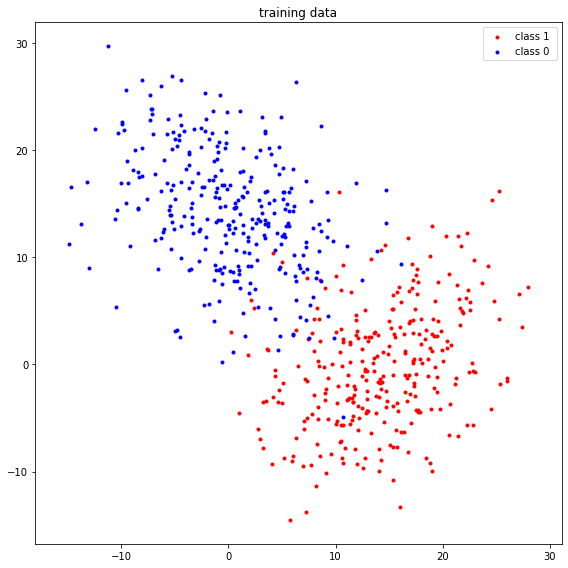

In [510]:
plot_data(label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

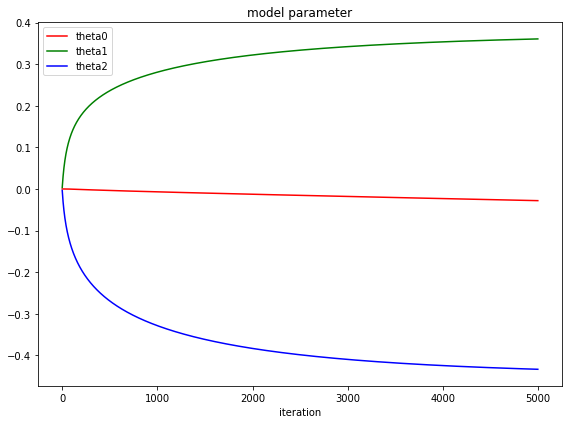

In [511]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

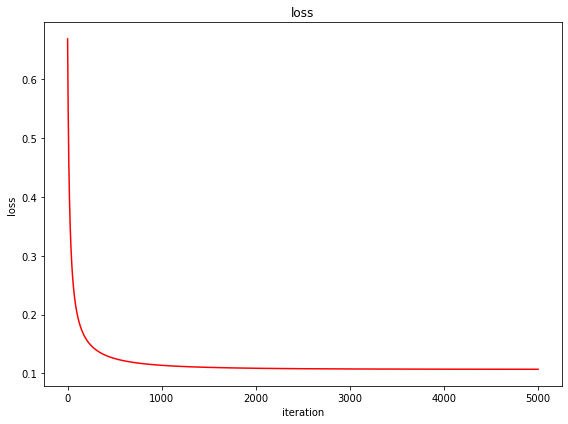

In [512]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

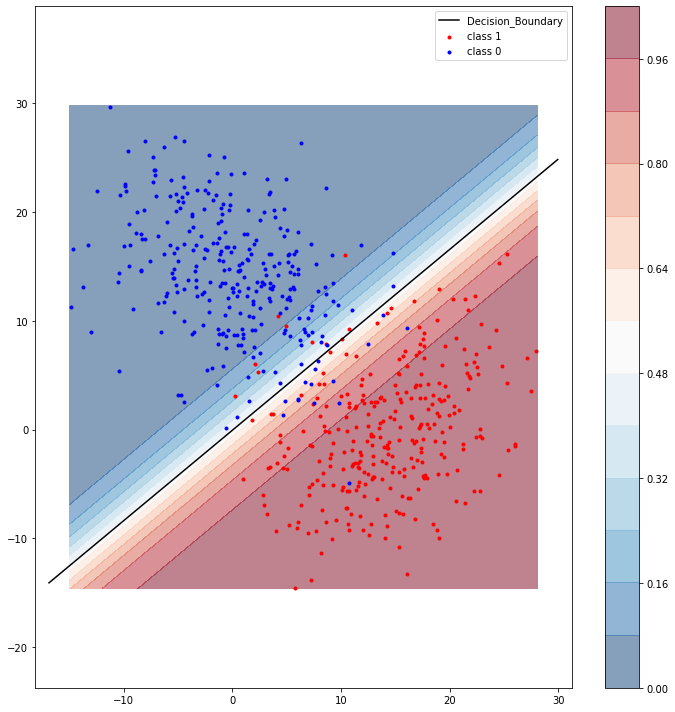

In [513]:
plot_classifier(point_x,point_y,theta,label)